In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd
import matplotlib
from matplotlib import patches
from sympy import *
import datetime
from functools import reduce
from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
import scipy

from scipy.optimize import minimize

import sys
import os

import itertools
from scipy.special import binom
from scipy.stats import ortho_group

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

from itertools import cycle

In [2]:
def myrepr(x):
    return repr(round(x, 2)).replace('.',',') if isinstance(x, float) else repr(x)

In [3]:
from logreg_functions import *
from sigmoid_functions import *

In [116]:
upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]
gamma_0_ar = [0.1, 0.5, 1, 2, 5, 10, 20]

for i, (upd_option, step_type, gamma_0) in enumerate(itertools.product (upd_option_ar, step_type_ar, gamma_0_ar)):
    print ("mpirun -n 4 python3 sign_sgd_majority.py --upd_option {0} --loss_func sigmoid --step_type {1} --max_it 10000 --gamma_0 {2} &&".format(upd_option,
                                                                                                                                              step_type,
                                                                                                                                          gamma_0))


mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 10000 --gamma_0 0.1 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 10000 --gamma_0 0.5 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 10000 --gamma_0 1 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 10000 --gamma_0 2 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 10000 --gamma_0 5 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 10000 --gamma_0 10 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 10000 --gamma_0 20 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_op

bash commands

python3 generate_data.py --n_workers 3

mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 100 --gamma_0 1



firstly lets find f_min of log-reg mushrooms

## sign_sgd_one_point_majority_log-reg_var

load all existent data

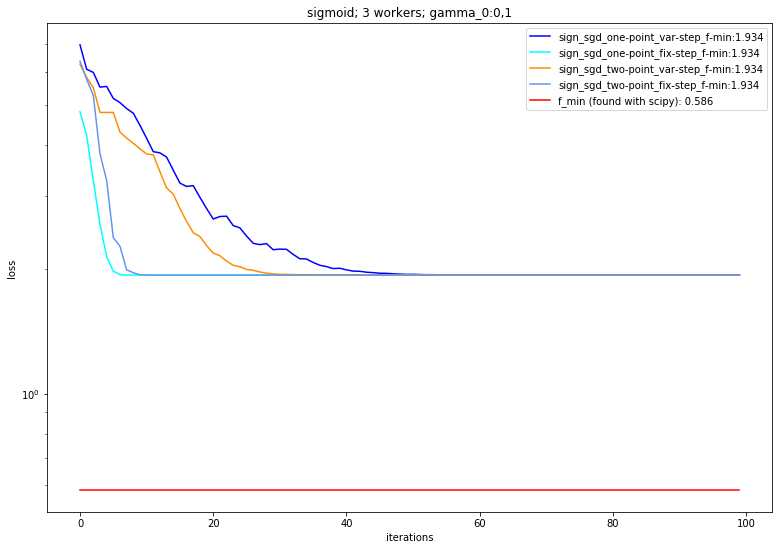

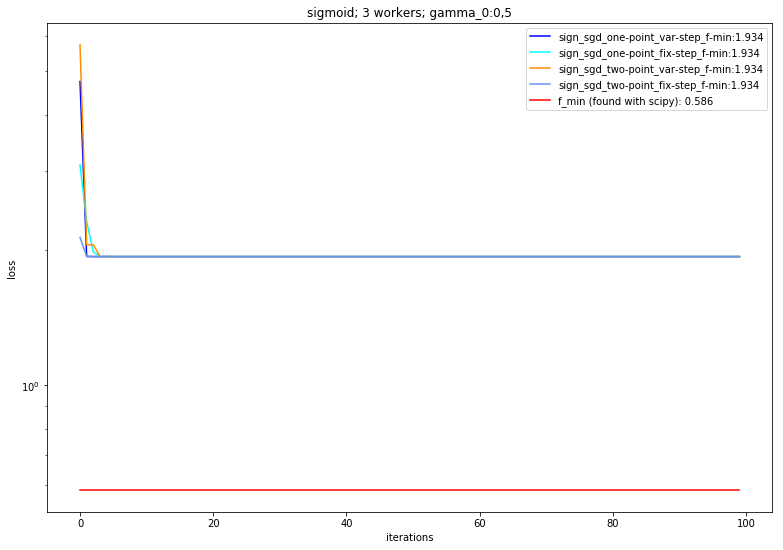

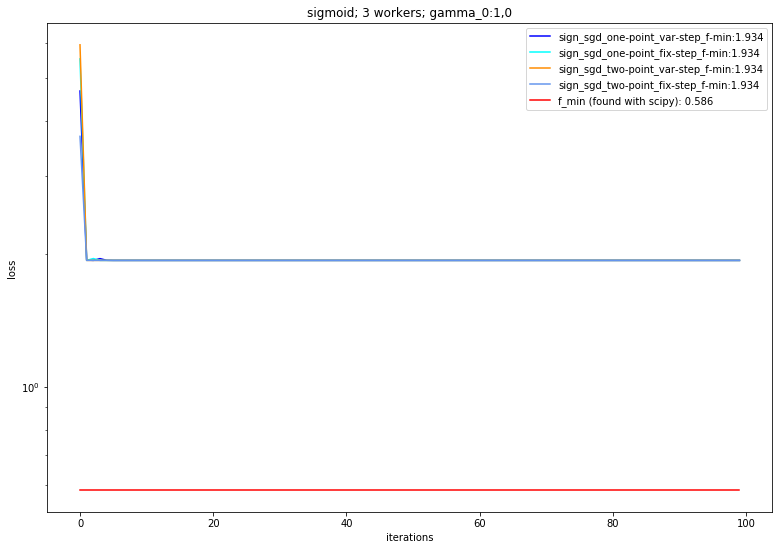

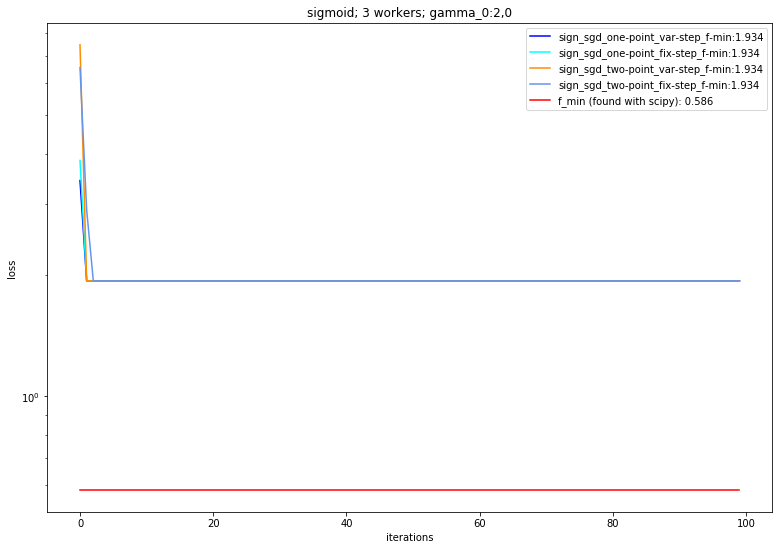

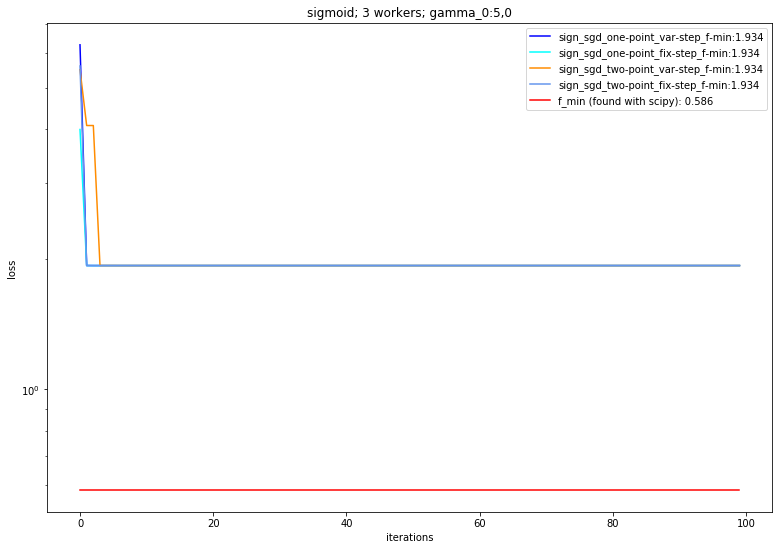

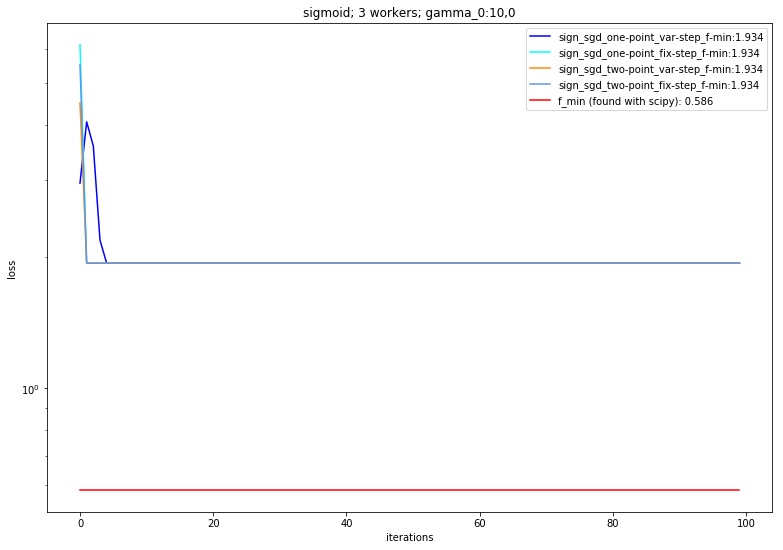

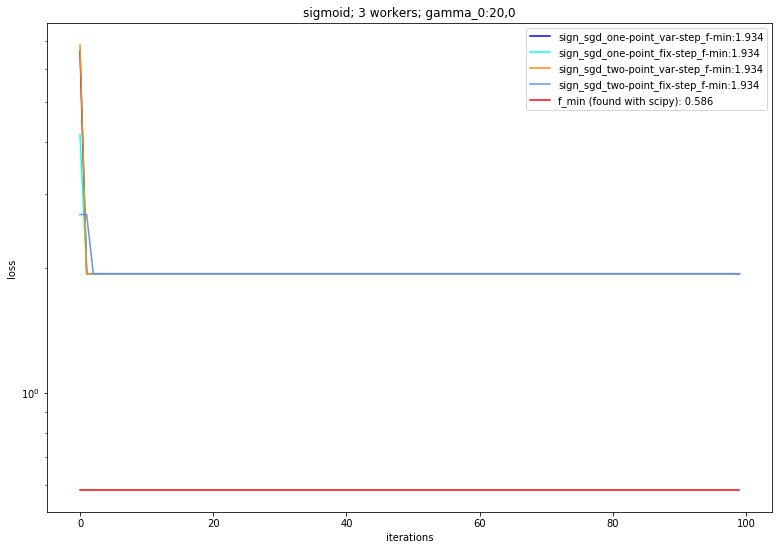

In [117]:
#upload whole data 
project_path = "/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/"

experiment_name_short = "sign_sgd"
experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms"]
loss_func_ar = ["log-reg", "sigmoid"]
upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]
n_workers_ar = [3]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]
batch_ar = [1]

clf_coef_ar = {}
X_train_ar = {}
y_train_ar = {}
la_ar = {}
f_min_ar = {}
info_num_ar = {}
loss_ar = {}
time_ar = {}
its_ar = {}
w_ar = {}
label_ar = {}

for experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch in \
itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar):
    experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)
    
    id_str = "{0}_{1}".format(dataset, experiment)#####
    id_func = "{0}_{1}".format(dataset, loss_func)#####
    id_dataset = "{0}_{1}".format(dataset, n_workers)#####
    id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
    
    logs_path = project_path + "logs_{0}_{1}/".format(dataset, experiment)
    data_path = project_path + "data_{0}_{1}/".format(dataset, n_workers)
    plot_path = project_path + "plot_{0}_{1}/".format(dataset, n_workers)
        
    if os.path.exists(plot_path) == False:
        os.mkdir(plot_path)
    
    if os.path.isfile(data_path + 'X.npy'):
        X_train_ar[id_dataset] = np.load(data_path + 'X.npy')
    if os.path.isfile(data_path + 'y.npy'):
        y_train_ar[id_dataset] = np.load(data_path + 'y.npy')
    
    if os.path.isfile(data_path + 'data_info.npy'): 
        data_info = np.load(data_path + 'data_info.npy')
        N, L = data_info[:2]
        if os.path.isfile(data_path + "clf_coef.npy"):
            clf_coef_ar[id_func] = np.load(data_path + "clf_coef.npy")
            f_min_ar[id_func] = logreg_loss (clf_coef_ar[id_func], X_train_ar[id_dataset], y_train_ar[id_dataset], L)
    
    
    
    if os.path.isfile(logs_path + 'info_number' + "_" + experiment + ".npy"): 
        info_num_ar[id_str]    = np.load(logs_path + 'info_number' + "_" + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'loss' + "_" + experiment + ".npy"):
        loss_ar[id_str] = np.load(logs_path + 'loss' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'time' + "_" + experiment + ".npy"):
        time_ar[id_str]        = np.load(logs_path + 'time' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'iteration' + "_" + experiment + ".npy"):
        its_ar[id_str] = np.load(logs_path + 'iteration' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'iterates' + "_" + experiment + ".npy"):
        w_ar[id_str] = np.load(logs_path + 'iterates' + '_' + experiment + ".npy")
        
    label_ar[id_label] = id_label

    
#what dow you want to show in the plot   

experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms"]
loss_func_ar = ["sigmoid"]
upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]
n_workers_ar = [3]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]
batch_ar = [1]
colors = ['blue', 'aqua', 'darkorange', 'cornflowerblue', 'red']
n_iter = 100

#plt.plot(its_ar[:np.argmin (loss_ar)], loss_ar[:np.argmin (loss_ar)], color=color, label=str(label_ar[0]))
for gamma_0 in  gamma_0_ar:
    for i, (experiment_name, dataset, loss_func, upd_option, step_type, n_workers, batch) in \
    enumerate(itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar,batch_ar)):
        experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)

        id_str = "{0}_{1}".format(dataset, experiment)
        id_func = "{0}_{1}".format(dataset, loss_func)
        id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
        if  ((id_str in its_ar) and id_str in loss_ar):
            if n_iter is None:
                plt.plot(its_ar[id_str], loss_ar[id_str], color=colors[i], label= label_ar[id_label] + "_f-min:{0}".format(round(np.min(loss_ar[id_str]), 3))  )
            else:
                plt.plot(its_ar[id_str][:n_iter], loss_ar[id_str][:n_iter], color=colors[i], label= label_ar[id_label] + "_f-min:{0}".format(round(np.min(loss_ar[id_str]), 3))  )
    
    if ((id_str in its_ar) and id_func in f_min_ar):
        if n_iter is None:
            plt.plot(its_ar[id_str], ([f_min_ar[id_func]]*its_ar[id_str].shape[0]), color='red', label="f_min (found with scipy): {0}".format(round(f_min_ar[id_func], 3)))
        else:
            plt.plot(its_ar[id_str][:n_iter], ([f_min_ar[id_func]]*its_ar[id_str].shape[0])[:n_iter], color='red', label="f_min (found with scipy): {0}".format(round(f_min_ar[id_func], 3)))
    
    plt.rcParams["figure.figsize"] = [13,9]
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.yscale('log')
    
    title = '{0}; {1} workers; gamma_0:{2}'.format( loss_func, n_workers, myrepr(gamma_0) )
    plt.title(title)
    plt.legend(loc="upper right")
    if n_iter is None:
        plt.savefig(plot_path + "{0}; {1} workers; {2} gamma_0; {3} n_iter .pdf".format(loss_func, n_workers, myrepr(gamma_0), its_ar[id_str].shape[0]))
    else:
        plt.savefig(plot_path + "{0}; {1} workers; {2} gamma_0; {3} n_iter .pdf".format(loss_func, n_workers, myrepr(gamma_0), n_iter))
    plt.show()


#plt.plot()

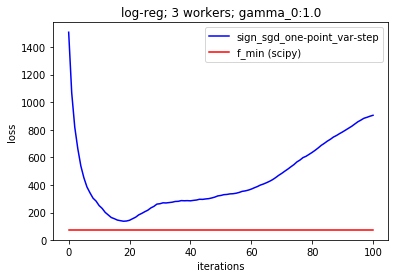

In [49]:
experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms"]
loss_func_ar = ["log-reg"]
upd_option_ar = ["one-point"]
step_type_ar = ["var-step"]
n_workers_ar = [3]
gamma_0_ar = [1.0]
batch_ar = [1]
colors = ['blue', 'aqua', 'darkorange', 'cornflowerblue', 'red']

#plt.plot(its_ar[:np.argmin (loss_ar)], loss_ar[:np.argmin (loss_ar)], color=color, label=str(label_ar[0]))
for i, (experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch) in \
enumerate(itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar)):
    experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)
    
    id_str = "{0}_{1}".format(dataset, experiment)
    id_func = "{0}_{1}".format(dataset, loss_func)
    id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
    id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
    if  ((id_str in its_ar) and id_str in loss_ar):        
        plt.plot(its_ar[id_str], loss_ar[id_str], color=colors[i], label=label_ar[id_label])
        
    if ((id_str in its_ar) and id_func in f_min_ar):
        plt.plot(its_ar[id_str], [f_min_ar[id_func]]*its_ar[id_str].shape[0], color='red', label="f_min (scipy)")


#print("f_min: {0}".format(f_min))

plt.ylabel('loss')
plt.xlabel('iterations')
#plt.yscale('log')

plt.title('{0}; {1} workers; gamma_0:{2}'.format( loss_func, n_workers, gamma_0 ))
plt.legend(loc="upper right")
#plt.plot()

In [89]:
f_min_ar[id_func]

0.5856886813710928

In [92]:
round (0.36784682734, 2)

0.37

## Auxilary computations

In [120]:
from logreg_functions import *
from sigmoid_functions import *
data_name = "mushrooms.txt"

user_dir = os.path.expanduser('~/')
SCRIPTS_PATH = '/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/data/'
DATA_PATH = '/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/data/'


project_path = "/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/"
data_path = project_path + "data_{0}_{1}/".format(dataset, n_workers)


Xs = []
ys = []

data, labels = load_svmlight_file(DATA_PATH + data_name)

enc_labels = labels.copy()
enc_labels[enc_labels==1] = -1
enc_labels[enc_labels==2] = 1
data_dense = data.todense()

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(data_dense, enc_labels, test_size=0.2, random_state=0)

X = np.array(train_feature_matrix)
y = np.array(train_labels)

#la = np.mean(np.diag(X.T @ X))

la = 1
f = lambda w: reg_bin_clf_loss(w, X, y)
grad = lambda w: reg_bin_clf_grad(w, X, y)

d = X.shape[1]

w0 = np.random.normal(loc=0.0, scale=5.0, size=d)
result = minimize (fun=f, x0=w0, jac=grad, method="L-BFGS-B",options={"maxiter":10000})

data_len = len(labels)

train_data_len = X.shape[0]



NameError: name 'reg_bin_clf_loss' is not defined